# Projeto 2
### Análise de Teste tipo A/B

___
#### <font color='red'>Gabriel Moreira, Leonardo Lamounier Grotti, Patrick Serrano Wiegerinck e Rodrigo Cavalieri Lino</font>

## Introdução

O projeto em questão tem como objetivo aplicar velhos e novos conceitos de estatística em um exercício de otimização de site. A conclusão do projeto resultará no aperfeiçoamento e agilização da navegação dentro do site utilizado como base de trabalho. Uma técnica muito utilizada por grandes empresas como Google e Amazon nessa tarefa é conhecido como Teste A/B, em que são criada duas versões distintas de uma mesma página da web, por exemplo, em que apenas alguns detalhes são modificados, permitindo um estudo mais preciso do tempo de navegação pelo site.

Com o auxílio de ferramentas de programação do Python será reliazado um Teste A/B, porém numa escala muito menor do que as feitas por grandes empresas, em relação a um site gerado pelos alunos da engenharia do Insper no curso de Co-Design de Aplicativos. Com o fim do estudo sobre o Teste A/B, espera-se ser capaz de gerar uma conclusão em relação as duas versões do site, identificando qual delas representada uma maior otimização da navegação pelo site. O detalhe escolhido para ser avaliado ao longo do Teste A/B foi o botão de navegação para a páginal do perfil do aluno, ou seja, o ícone que, ao ser clicado, direciona o usuário do site ao perfil do aluno, onde se encontram as informações pessoais. 

___
### Teste A

O teste A representa a versão original do site, sem nenhuma alteração.

___
### Teste B

O teste B representa a versão modificada do site, em que o botão que leva o usuário à página do perfil do aluno foi circulado por uma corda branca.

### Teste A/B

O resultado esperado é de que a versão B tenha uma reação mais rápida por parte dos usuários. Essa foi a hipótese inicial, uma vez que imagina-se que a corda branca em torno do botão torne o ícone mais evidente e, portanto, de mais rápida navegação.

___
## Análise Descritiva

Importando as ferramentas para a análise dos dados:

In [2]:
import pandas as pd
import json
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Exportando o arquivo json do Firebase:

In [4]:
arquivo = open("testeAB-export.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

Análise do atributo logs:

In [5]:
for k,v in dados_fire["logs"].items():
    for chave, valor in v.items():
        pass

Convertendo os dados obtidos do Firebase em um dataframe:

In [6]:
lista_dicionarios = []

for k,v in dados_fire["logs"].items():
    lista_dicionarios.append(v)

Convertendo a lista de dicionários em um dataframe:

In [7]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)

Criando um dataframe dos intervalos de tempo (delta T):

In [8]:
agrupado = dataframe.groupby(by=["user_id", "versao"])
users = set(dataframe.user_id)
users = list(users)

Separando os grupos de usuários de cada versão do Teste A/B:

In [9]:
resultados = []

for u in users:
    for versao in ["A", "B"]:
        if (u, versao) in agrupado.groups.keys():
            grupo1 =  agrupado.get_group((u, versao))
            grupo1 = grupo1.sort_values(by="tempo")
            
            if len(grupo1[grupo1.tipo=="final"])>= 1 and len(grupo1[grupo1.tipo=="inicio"]) >= 1:
                delta_t = grupo1[grupo1.tipo=="final"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicio"].iloc[0].tempo
                resultados.append({"user_id":u, "delta_t":delta_t, "versao":versao})

In [10]:
dataframe_resumo = pd.DataFrame.from_records(resultados)

Transformando o tempo em segundos:

In [11]:
dataframe_resumo.delta_t/=1000

Histogramas

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

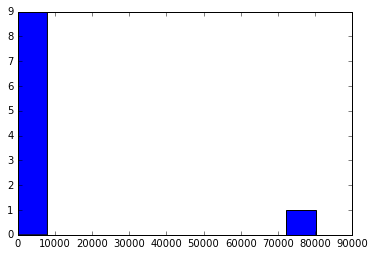

In [12]:
tempos_A = list(dataframe_resumo[dataframe_resumo.versao=="A"].delta_t)
tempos_B = list(dataframe_resumo[dataframe_resumo.versao=="B"].delta_t)
plt.hist(tempos_A, bins=10)
plt.hist(tempos_B, bins=10, alpha=0.5)

___
### Teste A

___
### Teste B

___
## Conclusão